In [10]:
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import plotly.express as px
import os
import sys
import plotly.graph_objects as go 
dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')
from labbiofisica import final_val

In [2]:
path = dir_path+'/data/'

spettri = pd.DataFrame()
for i in ['0','1','2','3','4','5']:
    c = 'C' + i
    data = pd.read_csv(path + c + '.dat',header = None, skiprows=1,sep='\t')
    
    spettri['λ'] = data.iloc[:, 0]
    spettri[c] = data.iloc[:,1]

spettri.tail()

,λ,C0,C1,C2,C3,C4,C5
55,205,-0.02454,-0.02172,-0.02031,-0.02233,-0.01931,-0.01872
56,204,-0.02265,-0.01981,-0.02289,-0.02221,-0.02085,-0.01986
57,203,-0.02256,-0.01913,-0.02492,-0.02548,-0.01868,-0.02221
58,202,-0.02118,-0.02115,-0.02197,-0.02395,-0.02055,-0.02537
59,201,-0.01932,-0.02146,-0.02278,-0.01982,-0.02226,-0.02139


In [3]:
# import concentrazioni
concentrazioni = pd.read_csv('concentrazioni_soluzioni.csv')['C(GuHCl) [M] sperimentale'].to_numpy() * 1000000 # μM
print('Concentrazione GuHCl [μM]: ',concentrazioni)

Concentrazione GuHCl [μM]:  [0.      1.56847 3.08505 4.60239 6.18847 7.73319]


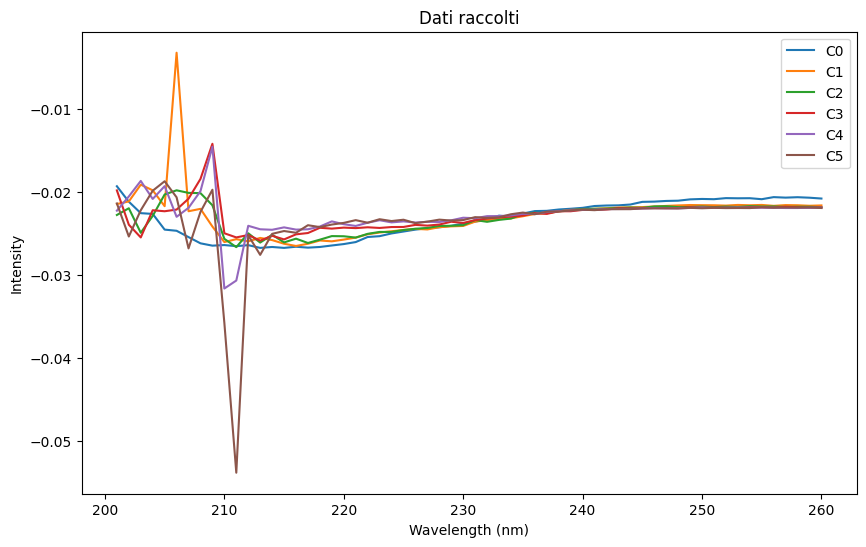

In [4]:
plt.figure(figsize=(10, 6))
for conc in ['C0', 'C1', 'C2','C3', 'C4', 'C5']:
    plt.plot(spettri['λ'], spettri[conc], label=conc)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.title('Dati raccolti')
plt.legend()
plt.show()

### APPAIO LE CODE

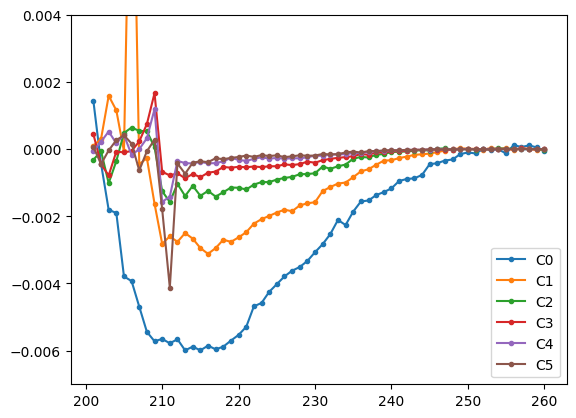

In [5]:
for i,conc in enumerate(['C0','C1', 'C2','C3', 'C4', 'C5']):
    λ =  spettri['λ']
    if i != 0:
        θ = spettri[conc]/(concentrazioni[i])
    else:
        θ = spettri[conc]

    mean = θ[λ > 250].mean()
    θ -= mean
    spettri[conc] = θ # diviso per la concentrazione e code appaiate a zero
    plt.plot(λ,θ,marker='.',label=conc)

plt.ylim([-0.007,+0.004])
plt.legend()
plt.show()

In [6]:
λ = spettri['λ']

λmin = 220
λmax = 230

imin,imax = λ[λ == λmin].index[0], λ[λ == λmax].index[0]
print(imin,imax)

Λ = np.arange(λmax,λmin-1,-1)

# Seleziona solo le colonne delle concentrazioni (senza le colonne λ)
spettro_ristretto = spettri.loc[imax:imin, ['C0','C1', 'C2', 'C3', 'C4', 'C5']]
spettro_ristretto = spettro_ristretto.T
spettro_ristretto.columns = Λ
spettro_ristretto.insert(0, 'Concentrazione', spettro_ristretto.index)
spettro_ristretto.reset_index(drop=True, inplace=True)
spettro_ristretto['Concentrazione'] = concentrazioni
display(spettro_ristretto)


40 30


,Concentrazione,230,229,228,227,226,225,224,223,222,221,220
0,0.00000,-0.003070,-0.003330,-0.003510,-0.003620,-0.003790,-0.004020,-0.004250,-0.004580,-0.004680,-0.005290,-0.005530
1,1.56847,-0.001582,-0.001614,-0.001677,-0.001850,-0.001805,-0.001888,-0.001990,-0.002085,-0.002219,-0.002474,-0.002627
2,3.08505,-0.000720,-0.000743,-0.000749,-0.000827,-0.000859,-0.000908,-0.000982,-0.000982,-0.001057,-0.001203,-0.001151
3,4.60239,-0.000406,-0.000374,-0.000447,-0.000476,-0.000456,-0.000510,-0.000513,-0.000536,-0.000519,-0.000541,-0.000528
4,6.18847,-0.000194,-0.000244,-0.000276,-0.000273,-0.000287,-0.000265,-0.000284,-0.000242,-0.000291,-0.000354,-0.000320
5,7.73319,-0.000192,-0.000200,-0.000185,-0.000216,-0.000240,-0.000187,-0.000207,-0.000179,-0.000233,-0.000193,-0.000236


In [7]:
fig = go.Figure()
colors = px.colors.sample_colorscale(px.colors.sequential.Plasma, len(Λ))

for idx,i in enumerate(range(λmin,λmax)):
    fig.add_trace(go.Scatter(
        x=spettro_ristretto['Concentrazione'],
        y=spettro_ristretto[i],
        mode='lines+markers',
        name=str(i)+'nm',
        line=dict(color=colors[idx]),
        marker=dict(color=colors[idx])
    ))

fig.update_layout(
    # yaxis_type='log',
    #title='Spettri ristretti (220-230 nm)',
    xaxis_title='Concentrazione [μM]',
    yaxis_title='θ',
    legend_title='λ [nm]',
    height=800,
    width=600,
    legend=dict(
        x=1,
        y=0,
        xanchor='right',
        yanchor='bottom'
    )
)
fig.show()

In [8]:
def sigmoid(x, yN,yD,A,Cmid):
    expo = A * (Cmid-x)
    num = yN + yD * np.exp(expo)
    den = 1 + np.exp(-expo)
    return num/den


# x = np.linspace(0,6,1000)
# plt.plot(x,sigmoid(x,-0.005,-0.0001,2,6))

# plt.show()

In [19]:
# fit con sigmoide

R = 8.314 # J/(mol * K)
T = 300 # K

fit_results = []

for i in spettro_ristretto.columns[1:]:
    C = concentrazioni
    θ = spettro_ristretto[i].to_numpy()

    # guess
    yD = θ[-1]
    yN = θ[0] # NON è UN PARAMETRO
    A = 0.5
    Cmid = np.mean(C)

    # fit
    popt, pcov = curve_fit(lambda x,yD,A,Cmid: sigmoid(x,yN,yD,A,Cmid), C, θ, p0=[yD, A, Cmid],maxfev=100000,)
    perr = np.sqrt(np.diag(pcov))
    fit_results.append({
        'λ': i,
        # 'yN': popt[0], 'yN_err': perr[0],
        'yD': popt[0], 'yD_err': perr[0],
        'A': popt[1], 'A_err': perr[1],
        'Cmid': popt[2], 'Cmid_err': perr[2]
    })

fit_df = pd.DataFrame(fit_results)
display(fit_df)

,λ,yD,yD_err,A,A_err,Cmid,Cmid_err
0,230,-0.060892,0.450892,0.275582,0.200271,-5.411433,17.376279
1,229,-0.029813,0.378263,0.317500,0.522278,-3.450015,25.667877
2,228,-0.025504,0.527577,0.327711,0.937979,-3.027916,40.229876
3,227,-0.036730,0.416355,0.298211,0.420609,-3.878363,24.493457
4,226,-0.028236,0.529505,0.323568,0.833236,-3.106977,36.977262
5,225,-0.027577,0.323430,0.331827,0.547903,-2.905011,22.466983
6,224,-0.030093,0.317634,0.330174,0.485966,-2.967849,20.350109
7,223,-0.032408,0.277552,0.345478,0.412561,-2.833560,15.778707
8,222,-0.047497,0.291654,0.318073,0.243090,-3.641612,12.440483
9,221,-0.070446,0.267649,0.312279,0.134705,-4.144318,7.873830


In [22]:
fig = go.Figure()

C_plot = np.linspace(concentrazioni.min(), concentrazioni.max(), 200)

for idx, row in fit_df.iterrows():
    yN = spettro_ristretto.loc[0, row['λ']]
    yD = row['yD']
    A = row['A']
    Cmid = row['Cmid']
    θ_fit = sigmoid(C_plot, yN, yD, A, Cmid)
    # Fit line
    fig.add_trace(go.Scatter(
        x=C_plot,
        y=θ_fit,
        mode='lines',
        line=dict(color=colors[idx]),
        name=f"Fit {int(row['λ'])} nm"
    ))
    # Experimental points
    fig.add_trace(go.Scatter(
        x=spettro_ristretto['Concentrazione'],
        y=spettro_ristretto[row['λ']],
        mode='markers',
        marker=dict(color=colors[idx]),
        name=f"Exp {int(row['λ'])} nm",
        showlegend=False
    ))

fig.update_layout(
    xaxis_title='Concentrazione [μM]',
    yaxis_title='θ (fit)',
    legend_title='λ [nm]',
    height=600,
    width=800
)

fig.show()

In [ ]:
# Extract Cmid and its error
Cmid_values = fit_df['Cmid']
Cmid_errors = fit_df['Cmid_err']

# Compute mean and standard error of the mean
weights = 1/Cmid_errors**2
mean_Cmid = np.average(Cmid_values, weights=weights)
mean_Cmid_err = np.sqrt(np.sum(weights*((Cmid_values-mean_Cmid)**2))/np.sum(weights))

import plotly.graph_objects as go

fig = go.Figure()

# markers
fig.add_trace(go.Scatter(
    x=fit_df['λ'],
    y=Cmid_values,
    error_y=dict(type='data', array=Cmid_errors, visible=True),
    mode='markers',
    name='Cmid'
))

mean_line_points = np.concatenate([[219],fit_df['λ'],[231]])
# mean dashed line
fig.add_trace(go.Scatter(
    x= mean_line_points,
    y=[mean_Cmid]*len(mean_line_points),
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Mean Cmid'
))

# bottom
fig.add_trace(go.Scatter(
    x=mean_line_points,
    y=[mean_Cmid - mean_Cmid_err]*len(mean_line_points),
    mode='lines',
    line=dict(color='red', width=0),
    showlegend=False
))
#top
fig.add_trace(go.Scatter(
    x=mean_line_points,
    y=[mean_Cmid + mean_Cmid_err]*len(mean_line_points),
    mode='lines',
    fill='tonexty',
    fillcolor='rgba(255,0,0,0.2)',
    line=dict(color='red', width=0),
    name='Mean ± SEM'
))

fig.update_layout(
    xaxis_title='λ [nm]',
    yaxis_title='Cmid',
    # title='Cmid vs λ with Mean and SEM',
    legend_title='Legend',
    legend=dict(
        x=1,
        y=1,
        xanchor='right',
        yanchor='top'
    )
)

fig.show()

In [ ]:
# Extract m and its error
m_values = fit_df['m']
m_errors = fit_df['m_err']

# Compute mean and standard error of the mean
weights_m = 1 / m_errors**2
mean_m = np.average(m_values, weights=weights_m)
mean_m_err = np.sqrt(np.sum(weights_m * ((m_values - mean_m) ** 2)) / np.sum(weights_m))

fig = go.Figure()

# markers with error bars
fig.add_trace(go.Scatter(
    x=fit_df['λ'],
    y=m_values,
    error_y=dict(type='data', array=m_errors, visible=True),
    mode='markers',
    name='m'
))

mean_line_points = np.concatenate([[λmin-1], fit_df['λ'], [λmax+1]])
# mean dashed line
fig.add_trace(go.Scatter(
    x=mean_line_points,
    y=[mean_m]*len(mean_line_points),
    mode='lines',
    line=dict(color='red', dash='dash'),
    name='Mean m'
))

# bottom
fig.add_trace(go.Scatter(
    x=mean_line_points,
    y=[mean_m - mean_m_err]*len(mean_line_points),
    mode='lines',
    line=dict(color='red', width=0),
    showlegend=False
))
# top
fig.add_trace(go.Scatter(
    x=mean_line_points,
    y=[mean_m + mean_m_err]*len(mean_line_points),
    mode='lines',
    fill='tonexty',
    fillcolor='rgba(255,0,0,0.2)',
    line=dict(color='red', width=0),
    name='Mean ± SEM'
))

fig.update_layout(
    xaxis_title='λ [nm]',
    yaxis_title='m',
    legend_title='Legend',
    legend=dict(
        x=1,
        y=1,
        xanchor='right',
        yanchor='top'
    )
)

fig.show()


In [ ]:
# stampa medie

# print("Media pesata di Cmid:", mean_Cmid)
# print("Errore sulla media pesata di Cmid:", mean_Cmid_err)
# print("Media pesata di m:", mean_m)
# print("Errore sulla media pesata di m:", mean_m_err)

print('Cmid: ',final_val(mean_Cmid,mean_Cmid_err,4,udm='μm'))
print('m: ',final_val(mean_m,mean_m_err,3,udm='μm^-1'))
